In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

In [2]:
with np.load("notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]

#flatten the 2D features to 1D
trainData=np.reshape(trainData, [3500, 28*28]) 
validData=np.reshape(validData, [100, 28*28]) 
testData=np.reshape(testData, [145, 28*28])




In [3]:
print(trainData.shape)
print(trainTarget.shape)

(3500, 784)
(3500, 1)


In [4]:
def logistic_regression(decay_lambda, iterations, mini_batch_size, learning_rate, num_classes):
    num_features=trainData.shape[1]
    
    X = tf.placeholder(dtype=tf.float64,shape=[None, num_features])
    Y = tf.placeholder(dtype=tf.int64,shape=[None, 1])
    
    W = tf.Variable(tf.zeros(dtype=tf.float64, shape=[num_features, num_classes]))
    b = tf.Variable(tf.zeros(dtype=tf.float64, shape=[num_classes]))
    
    #actual labels in one-hot vector form
    true_Y = tf.one_hot(Y, depth = num_classes)
    
    pred_Y = tf.matmul(X,W)+b
    
    
    
    Loss_D = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=true_Y,logits=pred_Y))
    Loss_W = 0.5*decay_lambda*tf.reduce_sum(tf.square(W))
    total_loss = Loss_D + Loss_W
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)
    train_set_size = trainData.shape[0]
    n_batch = train_set_size // mini_batch_size + (train_set_size % mini_batch_size != 0)
    init = tf.global_variables_initializer()
    
    #define an accuracy op for validation accuracy rate
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(Y), tf.argmax(pred_Y, axis=1)), tf.float64))
    
    with tf.Session() as sess:
        epoch_trace = []
        training_loss_trace = []
        training_accuracy_trace = []
        validation_loss_trace = []
        validation_accuracy_trace = []
        
        sess.run(init)
        
        for step in range(iterations):
            i_batch = (step%n_batch)*mini_batch_size
            xs = trainData[i_batch:i_batch+mini_batch_size]
            ys = trainTarget[i_batch:i_batch+mini_batch_size]
            
            Validation_Cost = sess.run(total_loss, feed_dict={X:validData, Y:validTarget})
            Validation_Accuracy = sess.run(accuracy, feed_dict={X:validData, Y:validTarget})
            
            Training_Cost = sess.run(total_loss, feed_dict={X:xs, Y:ys})
            Training_Accuracy = sess.run(accuracy, feed_dict={X:xs, Y:ys})
            
            sess.run(optimizer, feed_dict={X:xs, Y:ys})
            
            if(step%n_batch==0):
                epoch_number = step/n_batch
                epoch_trace.append(epoch_number)
                training_loss_trace.append(Training_Cost)
                training_accuracy_trace.append(Training_Accuracy)
                validation_loss_trace.append(Validation_Cost)
                validation_accuracy_trace.append(Validation_Accuracy)
                
    
        # Accuracy Rate for Validation Set
        output_str = "When weight decay coefficient = {}, " \
                     + "total iterations = {}, " \
                     + "mini_batch_size = {}, " \
                     + "learning rate = {}, " \
                     + "and total number of classes = {}:\n" \
                     + "the Accuracy Rate for Training Set is {:.6f} after training is finished.\n" \
                     + "The Accuracy Rate for Validation Set is {:.6f}.\n" \
                     + "The Accuracy Rate for Test Set is {:.6f}.\n" \
                     + "\n"
        train_accu = sess.run(accuracy, feed_dict={X:trainData, Y:trainTarget})
        valid_accu = sess.run(accuracy, feed_dict={X:validData, Y:validTarget})
        test_accu = sess.run(accuracy, feed_dict={X:testData, Y:testTarget})
        print(output_str.format(decay_lambda, iterations, mini_batch_size, learning_rate, \
              num_classes, train_accu, valid_accu, test_accu))
               
    return epoch_trace,training_loss_trace, training_accuracy_trace, \
            validation_loss_trace, validation_accuracy_trace

2.1 Binary cross-entropy loss [9 points]
    1. Learning [4 pts]: tuning learning rate = 0.01, 0.005, 0.001, 0.0001

In [15]:
points0 = logistic_regression(decay_lambda=0.05, iterations=5000, mini_batch_size=500, learning_rate=0.01, num_classes=2)

When weight decay coefficient = 0.05, total iterations = 5000, mini_batch_size = 500, learning rate = 0.01, and total number of classes = 2:
the Accuracy Rate for Training Set is 0.984857 after training is finished.
The Accuracy Rate for Validation Set is 0.980000.
The Accuracy Rate for Test Set is 0.979310.




When weight decay coefficient = 0.01, total iterations = 5000, mini_batch_size = 500, learning rate = 0.01, and total number of classes = 2:
the Accuracy Rate for Training Set is 0.986000 after training is finished.
The Accuracy Rate for Validation Set is 0.980000.
The Accuracy Rate for Test Set is 0.979310.


When weight decay coefficient = 0.01, total iterations = 5000, mini_batch_size = 500, learning rate = 0.005, and total number of classes = 2:
the Accuracy Rate for Training Set is 0.983714 after training is finished.
The Accuracy Rate for Validation Set is 0.980000.
The Accuracy Rate for Test Set is 0.979310.


When weight decay coefficient = 0.01, total iterations = 5000, mini_batch_size = 500, learning rate = 0.001, and total number of classes = 2:
the Accuracy Rate for Training Set is 0.980000 after training is finished.
The Accuracy Rate for Validation Set is 0.980000.
The Accuracy Rate for Test Set is 0.979310.


When weight decay coefficient = 0.01, total iterations = 5000,

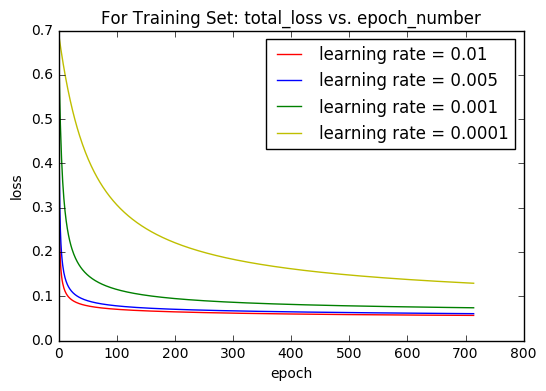

In [5]:
points1 = logistic_regression(decay_lambda=0.01, iterations=5000, mini_batch_size=500, learning_rate=0.01, num_classes=2)
points2 = logistic_regression(decay_lambda=0.01, iterations=5000, mini_batch_size=500, learning_rate=0.005, num_classes=2)
points3 = logistic_regression(decay_lambda=0.01, iterations=5000, mini_batch_size=500, learning_rate=0.001, num_classes=2)
points4 = logistic_regression(decay_lambda=0.01, iterations=5000, mini_batch_size=500, learning_rate=0.0001, num_classes=2)

plt.plot(points1[0], points1[1], 'r', label='learning rate = 0.01')
plt.plot(points2[0], points2[1], 'b', label='learning rate = 0.005')
plt.plot(points3[0], points3[1], 'g', label='learning rate = 0.001')
plt.plot(points4[0], points4[1], 'y', label='learning rate = 0.0001')

plt.title('For Training Set: total_loss vs. epoch_number')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

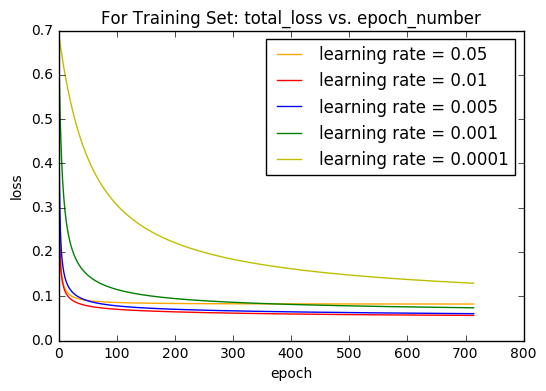

In [17]:
plt.plot(points0[0], points0[1], 'orange', label='learning rate = 0.05')
plt.plot(points1[0], points1[1], 'r', label='learning rate = 0.01')
plt.plot(points2[0], points2[1], 'b', label='learning rate = 0.005')
plt.plot(points3[0], points3[1], 'g', label='learning rate = 0.001')
plt.plot(points4[0], points4[1], 'y', label='learning rate = 0.0001')

plt.title('For Training Set: total_loss vs. epoch_number')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

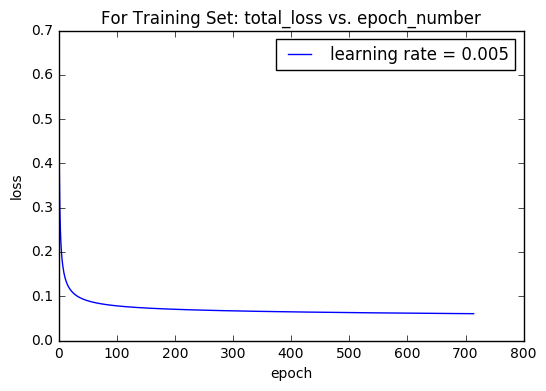

In [6]:
plt.plot(points2[0], points2[1], 'b', label='learning rate = 0.005')

plt.title('For Training Set: total_loss vs. epoch_number')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

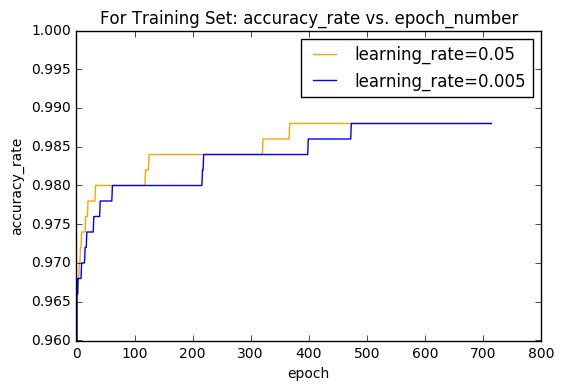

In [19]:
plt.plot(points2[0], points2[2], 'b',label='learning_rate=0.005')

plt.title('For Training Set: accuracy_rate vs. epoch_number')
plt.xlabel('epoch')
plt.ylabel('accuracy_rate')
plt.ylim(0.96,1)
plt.legend()
plt.show()

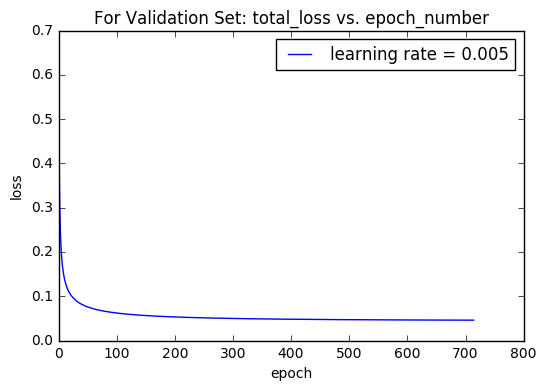

In [8]:
plt.plot(points2[0], points2[3], 'b', label='learning rate = 0.005')

plt.title('For Validation Set: total_loss vs. epoch_number')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

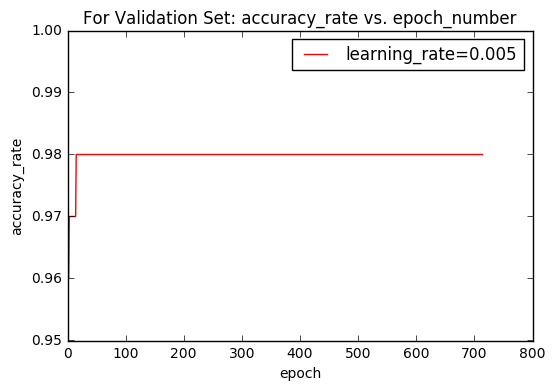

In [9]:
plt.plot(points2[0], points2[4], 'r',label='learning_rate=0.005')

plt.title('For Validation Set: accuracy_rate vs. epoch_number')
plt.xlabel('epoch')
plt.ylabel('accuracy_rate')
plt.ylim(0.95,1)

plt.legend()
plt.show()

    2. Beyond plain SGD [2 pts]:

In [10]:
def logistic_regression_Adam(decay_lambda, iterations, mini_batch_size, learning_rate, num_classes):
    num_features=trainData.shape[1]
    
    X = tf.placeholder(dtype=tf.float64,shape=[None, num_features])
    Y = tf.placeholder(dtype=tf.int64,shape=[None, 1])
    
    W = tf.Variable(tf.zeros(dtype=tf.float64, shape=[num_features, num_classes]))
    b = tf.Variable(tf.zeros(dtype=tf.float64, shape=[num_classes]))
    
    #actual labels in one-hot vector form
    true_Y = tf.one_hot(Y, depth = num_classes)
    
    pred_Y = tf.matmul(X,W)+b
    
    Loss_D = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=true_Y,logits=pred_Y))
    Loss_W = 0.5*decay_lambda*tf.reduce_sum(tf.square(W))
    total_loss = Loss_D + Loss_W
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(total_loss)
    train_set_size = trainData.shape[0]
    n_batch = train_set_size // mini_batch_size + (train_set_size % mini_batch_size != 0)
    init = tf.global_variables_initializer()
    
    #define an accuracy op for validation accuracy rate
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(Y), tf.argmax(pred_Y, axis=1)), tf.float64))
    
    with tf.Session() as sess:
        epoch_trace = []
        training_loss_trace = []
        training_accuracy_trace = []
        validation_loss_trace = []
        validation_accuracy_trace = []
        
        sess.run(init)
        
        for step in range(iterations):
            i_batch = (step%n_batch)*mini_batch_size
            xs = trainData[i_batch:i_batch+mini_batch_size]
            ys = trainTarget[i_batch:i_batch+mini_batch_size]
            
            Validation_Cost = sess.run(total_loss, feed_dict={X:validData, Y:validTarget})
            Validation_Accuracy = sess.run(accuracy, feed_dict={X:validData, Y:validTarget})
            
            Training_Cost = sess.run(total_loss, feed_dict={X:xs, Y:ys})
            Training_Accuracy = sess.run(accuracy, feed_dict={X:xs, Y:ys})
            
            sess.run(optimizer, feed_dict={X:xs, Y:ys})
            
            if(step%n_batch==0):
                epoch_number = step/n_batch
                epoch_trace.append(epoch_number)
                training_loss_trace.append(Training_Cost)
                training_accuracy_trace.append(Training_Accuracy)
                validation_loss_trace.append(Validation_Cost)
                validation_accuracy_trace.append(Validation_Accuracy)
                
    
        # Accuracy Rate for Validation Set
        output_str = "When weight decay coefficient = {}, " \
                     + "total iterations = {}, " \
                     + "mini_batch_size = {}, " \
                     + "learning rate = {}, " \
                     + "and total number of classes = {}:\n" \
                     + "the Accuracy Rate for Training Set is {:.6f} after training is finished.\n" \
                     + "The Accuracy Rate for Validation Set is {:.6f}.\n" \
                     + "The Accuracy Rate for Test Set is {:.6f}.\n" \
                     + "\n"
        train_accu = sess.run(accuracy, feed_dict={X:trainData, Y:trainTarget})
        valid_accu = sess.run(accuracy, feed_dict={X:validData, Y:validTarget})
        test_accu = sess.run(accuracy, feed_dict={X:testData, Y:testTarget})
        print(output_str.format(decay_lambda, iterations, mini_batch_size, learning_rate, \
              num_classes, train_accu, valid_accu, test_accu))
               
    return epoch_trace,training_loss_trace, training_accuracy_trace, \
            validation_loss_trace, validation_accuracy_trace

In [11]:
points5 = logistic_regression_Adam(decay_lambda=0.01, iterations=5000, mini_batch_size=500, learning_rate=0.001, num_classes=2)

When weight decay coefficient = 0.01, total iterations = 5000, mini_batch_size = 500, learning rate = 0.001, and total number of classes = 2:
the Accuracy Rate for Training Set is 0.987714 after training is finished.
The Accuracy Rate for Validation Set is 0.980000.
The Accuracy Rate for Test Set is 0.979310.




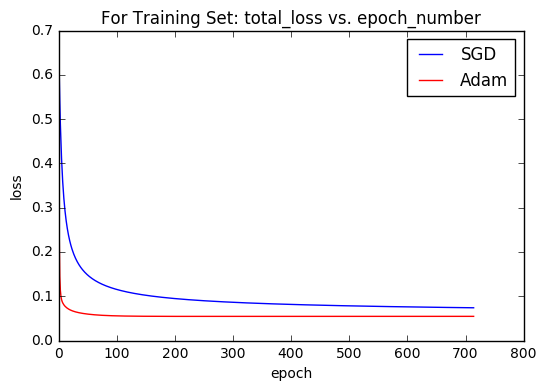

In [12]:
plt.plot(points3[0], points3[1], 'b', label='SGD')
plt.plot(points5[0], points5[1], 'r', label='Adam')

plt.title('For Training Set: total_loss vs. epoch_number')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

    3. Comparison with linear regression [3 pts]:

In [13]:
# For zero weight decay, compare the train, validation and test classification accuracy of the
# linear regression using "normal equation" to the optimal logistic regression learnt without
# weight decay.

points6 = logistic_regression_Adam(decay_lambda=0, iterations=5000, mini_batch_size=500, learning_rate=0.005, num_classes=2)

When weight decay coefficient = 0, total iterations = 5000, mini_batch_size = 500, learning rate = 0.005, and total number of classes = 2:
the Accuracy Rate for Training Set is 0.999714 after training is finished.
The Accuracy Rate for Validation Set is 0.990000.
The Accuracy Rate for Test Set is 0.979310.




In [23]:
# Also, for zero weight decay and learning rate of 0.001, plot the training cross entropy (or MSE) 
# and accuracy curves for linear and logistic regression.

points7 = logistic_regression_Adam(decay_lambda=0, iterations=5000, mini_batch_size=500, learning_rate=0.001, num_classes=2)

When weight decay coefficient = 0, total iterations = 5000, mini_batch_size = 500, learning rate = 0.001, and total number of classes = 2:
the Accuracy Rate for Training Set is 0.998000 after training is finished.
The Accuracy Rate for Validation Set is 0.990000.
The Accuracy Rate for Test Set is 0.979310.


